# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

# Importing Libraries


In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# import packages
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

from sklearn.impute import SimpleImputer

#import missingno as msno
#from textwrap import wrap

# Data loading and cleaning

## Transaction dataset

In [90]:
# Loading dataset of transactions
transaction_df = pd.read_excel('/content/drive/My Drive/Materials/KPMG_VI_New_raw_data_update_final.xlsx','Transactions')

In [91]:
# View data
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [92]:
# Set column names using first row of the dataframe
transaction_df.columns = transaction_df.iloc[0]
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [93]:
# drop the first row
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)

In [94]:
# recheck the dataset
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [95]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [96]:
# statistical summary for the dataset
print(transaction_df.describe())

0       transaction_id  product_id  customer_id     transaction_date  \
count            20000       20000        20000                20000   
unique           20000         101         3494                  364   
top                  1           0         2183  2017-02-14 00:00:00   
freq                 1        1378           14                   82   

0      online_order order_status  brand product_line product_class  \
count         19640        20000  19803        19803         19803   
unique            2            2      6            4             3   
top            True     Approved  Solex     Standard        medium   
freq           9829        19821   4253        14176         13826   

0      product_size  list_price  standard_cost  product_first_sold_date  
count         19803    20000.00       19803.00                    19803  
unique            3      296.00         103.00                      100  
top          medium     2091.47         388.92                    

In [97]:
# data summary
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [98]:
# Inspect missing values in the dataset
transaction_df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

* Here, we can see that we have 1542 null values. Which we use most frequent value to fill in.

In [99]:
# Columns with missing values, use simpleimputer(mode imputation to fill in)
columns_to_impute = transaction_df.columns[6:10]
# Initialize SimpleImputer with the strategy as 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the selected columns
transaction_df[columns_to_impute] = imputer.fit_transform(transaction_df[columns_to_impute])

In [100]:
# check the missing values again
transaction_df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [101]:
#check if there is any duplicate rows
duplicateRows = transaction_df[transaction_df.duplicated()]
#view duplicate rows
duplicateRows

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


* There is no duplicate rows in the dataset.

In [102]:
# change data type of transaction_date to datetime datatype
# Convert 'transaction_date' to datetime
transaction_df['transaction_date'] = pd.to_datetime(transaction_df['transaction_date'])
# recheck datatype
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  object        
 1   product_id               20000 non-null  object        
 2   customer_id              20000 non-null  object        
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  object        
 11  standard_cost            19803 non-null  object        
 12  product_first_sold_date  19803 n

In [103]:
# product_first_sold_date is really hard to identify the exact time, so we drop the column
transaction_df.drop('product_first_sold_date', axis=1, inplace=True)


In [104]:
# check the dataset again
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48


In [105]:
# extract brand name
# Use regular expressions to split 'text_column'
transaction_df[['new_brand', 'last']] = transaction_df['brand'].str.extract(r'(\w+)\s+(\w+)')
# Fill 'new_brand' with the original 'brand' value where no space was found
transaction_df['new_brand'].fillna(transaction_df['brand'], inplace=True)

transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,new_brand,last
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,Solex,NaN
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,Trek,Bicycles
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,OHM,Cycles
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,Norco,Bicycles
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,Giant,Bicycles


In [106]:

# Drop the 'brand' and 'last' columns
transaction_df.drop(columns=['brand', 'last'], inplace=True)

# Rename 'new_brand' to 'brand'
transaction_df.rename(columns={'new_brand': 'brand'}, inplace=True)

# Display the result
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,brand
1,1,2,2950,2017-02-25,False,Approved,Standard,medium,medium,71.49,53.62,Solex
2,2,3,3120,2017-05-21,True,Approved,Standard,medium,large,2091.47,388.92,Trek
3,3,37,402,2017-10-16,False,Approved,Standard,low,medium,1793.43,248.82,OHM
4,4,88,3135,2017-08-31,False,Approved,Standard,medium,medium,1198.46,381.1,Norco
5,5,78,787,2017-10-01,True,Approved,Standard,medium,large,1765.3,709.48,Giant


# EDA

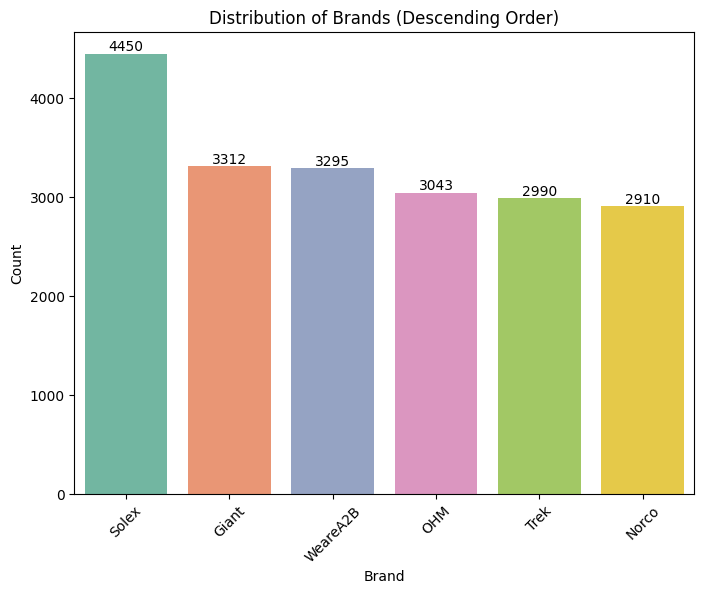

In [107]:
# Calculate and sort the brand counts in descending order
brand_counts = transaction_df['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']
brand_counts = brand_counts.sort_values(by='count', ascending=False)

# Create a bar plot using Seaborn with the sorted order
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.barplot(x='brand', y='count', data=brand_counts, palette='Set2')

# Add labels and title
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Brands (Descending Order)')

# Add labels on top of the bars
for item in ax.containers:
    ax.bar_label(item)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

* We can see that Solex, Giant and WeareA2B are Top 3 brands.

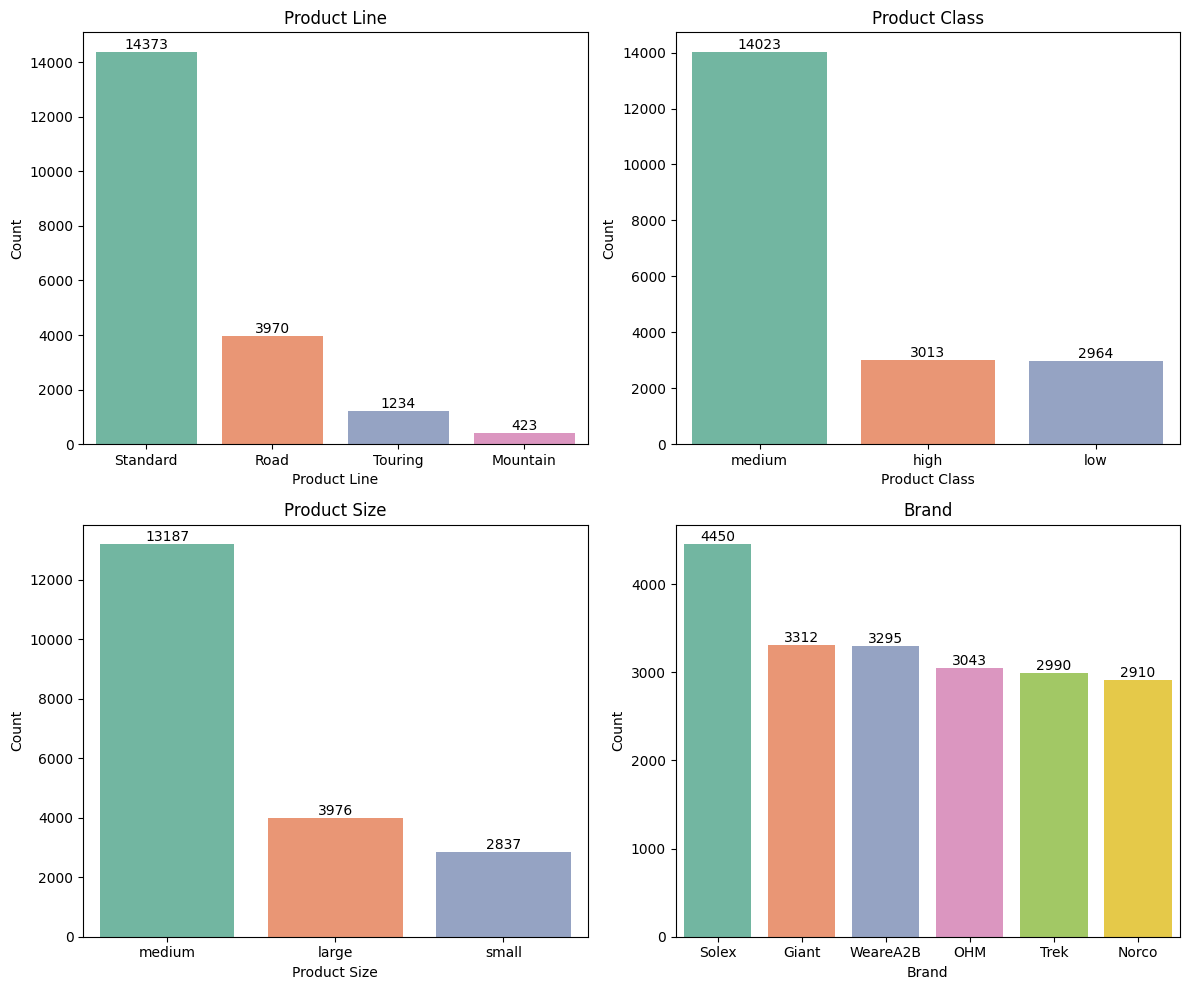

In [108]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot product_line with labels and custom x-axis labels
order_line = transaction_df['product_line'].value_counts().index
sns.countplot(ax=axes[0, 0], x='product_line', data=transaction_df, order=order_line, palette='Set2')
axes[0, 0].set_title('Product Line')
axes[0, 0].set_xlabel('Product Line')
axes[0, 0].set_ylabel('Count')
for item in axes[0, 0].containers:
    axes[0, 0].bar_label(item, fmt='%d', label_type='edge')

# Plot product_class with labels and custom x-axis labels
order_class = transaction_df['product_class'].value_counts().index
sns.countplot(ax=axes[0, 1], x='product_class', data=transaction_df, order=order_class, palette='Set2')
axes[0, 1].set_title('Product Class')
axes[0, 1].set_xlabel('Product Class')
axes[0, 1].set_ylabel('Count')
for item in axes[0, 1].containers:
    axes[0, 1].bar_label(item, fmt='%d', label_type='edge')

# Plot product_size with labels and custom x-axis labels
order_size = transaction_df['product_size'].value_counts().index
sns.countplot(ax=axes[1, 0], x='product_size', data=transaction_df, order=order_size, palette='Set2')
axes[1, 0].set_title('Product Size')
axes[1, 0].set_xlabel('Product Size')
axes[1, 0].set_ylabel('Count')
for item in axes[1, 0].containers:
    axes[1, 0].bar_label(item, fmt='%d', label_type='edge')

# Plot brand with labels and custom x-axis labels
order_brand = transaction_df['brand'].value_counts().index
sns.countplot(ax=axes[1, 1], x='brand', data=transaction_df, order=order_brand, palette='Set2')
axes[1, 1].set_title('Brand')
axes[1, 1].set_xlabel('Brand')
axes[1, 1].set_ylabel('Count')
for item in axes[1, 1].containers:
    axes[1, 1].bar_label(item, fmt='%d', label_type='edge')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

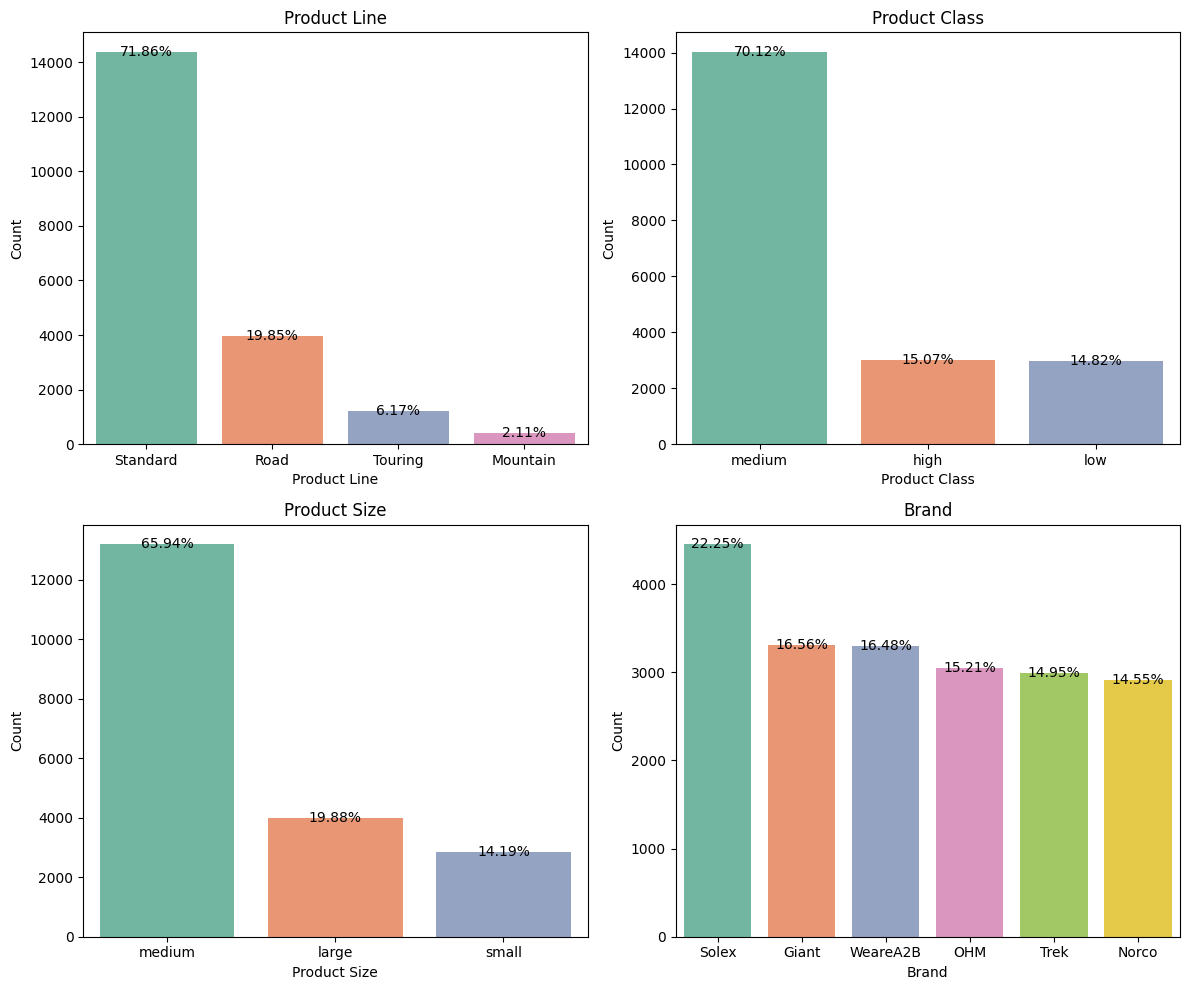

In [109]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Function to calculate and format percentage labels
def calculate_percentage_labels(heights):
    total = sum(heights)
    return [f'{height / total * 100:.2f}%' for height in heights]

# Plot product_line with percentage labels
order_line = transaction_df['product_line'].value_counts().index
sns.countplot(ax=axes[0, 0], x='product_line', data=transaction_df, order=order_line, palette='Set2')
axes[0, 0].set_title('Product Line')
axes[0, 0].set_xlabel('Product Line')
axes[0, 0].set_ylabel('Count')
heights = [p.get_height() for p in axes[0, 0].patches]
percentage_labels = calculate_percentage_labels(heights)
for p, label in zip(axes[0, 0].patches, percentage_labels):
    axes[0, 0].annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Plot product_class with percentage labels
order_class = transaction_df['product_class'].value_counts().index
sns.countplot(ax=axes[0, 1], x='product_class', data=transaction_df, order=order_class, palette='Set2')
axes[0, 1].set_title('Product Class')
axes[0, 1].set_xlabel('Product Class')
axes[0, 1].set_ylabel('Count')
heights = [p.get_height() for p in axes[0, 1].patches]
percentage_labels = calculate_percentage_labels(heights)
for p, label in zip(axes[0, 1].patches, percentage_labels):
    axes[0, 1].annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Plot product_size with percentage labels
order_size = transaction_df['product_size'].value_counts().index
sns.countplot(ax=axes[1, 0], x='product_size', data=transaction_df, order=order_size, palette='Set2')
axes[1, 0].set_title('Product Size')
axes[1, 0].set_xlabel('Product Size')
axes[1, 0].set_ylabel('Count')
heights = [p.get_height() for p in axes[1, 0].patches]
percentage_labels = calculate_percentage_labels(heights)
for p, label in zip(axes[1, 0].patches, percentage_labels):
    axes[1, 0].annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Plot brand with percentage labels
order_brand = transaction_df['brand'].value_counts().index
sns.countplot(ax=axes[1, 1], x='brand', data=transaction_df, order=order_brand, palette='Set2')
axes[1, 1].set_title('Brand')
axes[1, 1].set_xlabel('Brand')
axes[1, 1].set_ylabel('Count')
heights = [p.get_height() for p in axes[1, 1].patches]
percentage_labels = calculate_percentage_labels(heights)
for p, label in zip(axes[1, 1].patches, percentage_labels):
    axes[1, 1].annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

* From above, we can see that standard bikes, medium-class, medium-sized and Solex bikes are most popular.

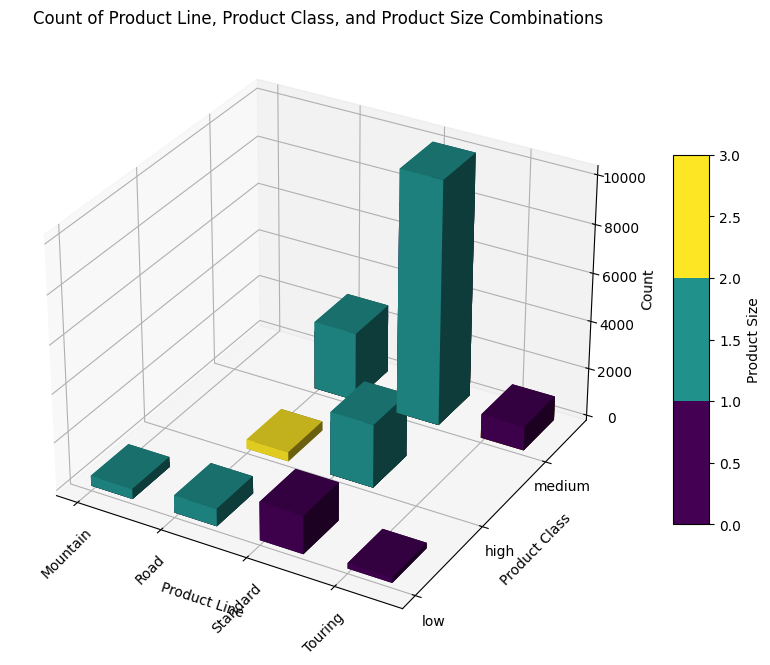

In [110]:
# Count the occurrences of combinations of the three categorical variables
grouped_counts = transaction_df.groupby(['product_line', 'product_class', 'product_size']).size().reset_index(name='count')

# Define unique categories for each variable
product_lines = grouped_counts['product_line'].unique()
product_classes = grouped_counts['product_class'].unique()
product_sizes = grouped_counts['product_size'].unique()

# Create positions for the bars in the 3D-like space
xpos = np.arange(len(product_lines))
ypos = np.arange(len(product_classes))
x, y = np.meshgrid(xpos, ypos, indexing="ij")

# Initialize the height (count) for each bar
z = np.zeros_like(x)

# Create a colormap for product_size
cmap = plt.get_cmap('viridis', len(product_sizes))

# Create the 3D bars and set colors based on product_size
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i, row in grouped_counts.iterrows():
    product_line_idx = np.where(product_lines == row['product_line'])[0][0]
    product_class_idx = np.where(product_classes == row['product_class'])[0][0]
    x_position = x[product_line_idx, product_class_idx]
    y_position = y[product_line_idx, product_class_idx]
    z[x_position, y_position] += row['count']
    color = cmap(np.where(product_sizes == row['product_size'])[0][0])
    ax.bar3d(x_position, y_position, 0, dx=0.5, dy=0.5, dz=z[x_position, y_position], color=color, shade=True)

# Set x, y, and z labels
ax.set_xlabel('Product Line')
ax.set_ylabel('Product Class')
ax.set_zlabel('Count')

# Set x and y ticks and labels
ax.set_xticks(xpos)
ax.set_yticks(ypos)
ax.set_xticklabels(product_lines)
ax.set_yticklabels(product_classes)

# Rotate the x-axis labels for better readability
ax.set_xticklabels(product_lines, rotation=45)

# Create a colorbar for product_size
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(product_sizes)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=10)
cbar.set_label('Product Size')

# Set the plot title
plt.title('Count of Product Line, Product Class, and Product Size Combinations')

# Add a grid
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

* From above visualization, we can see that medium-sized,medium-class and standard bikes are most popular, then it's followed by medium-sized, high-class and standard bikes and medium-sized, medium-class and road bikes.

# Cohort Analysis

## Assigned the cohorts and calculated the monthly offset

In [111]:
dt.datetime(transaction_df['transaction_date'][1].year, transaction_df['transaction_date'][1].month, 1)

datetime.datetime(2017, 2, 1, 0, 0)

In [112]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)
# Create transaction_date column based on month and store in TransactionMonth
transaction_df['TransactionMonth'] = transaction_df['transaction_date'].apply(get_month)
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,brand,TransactionMonth
1,1,2,2950,2017-02-25,False,Approved,Standard,medium,medium,71.49,53.62,Solex,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Standard,medium,large,2091.47,388.92,Trek,2017-05-01
3,3,37,402,2017-10-16,False,Approved,Standard,low,medium,1793.43,248.82,OHM,2017-10-01
4,4,88,3135,2017-08-31,False,Approved,Standard,medium,medium,1198.46,381.1,Norco,2017-08-01
5,5,78,787,2017-10-01,True,Approved,Standard,medium,large,1765.3,709.48,Giant,2017-10-01


In [113]:

# creating groups within the DataFrame based on the 'customer_id' column,calculates the minimum value (earliest date) within each group of 'TransactionMonth' values for each customer
transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')

1       2017-02-01
2       2017-01-01
3       2017-01-01
4       2017-02-01
5       2017-01-01
           ...    
19996   2017-01-01
19997   2017-01-01
19998   2017-04-01
19999   2017-02-01
20000   2017-03-01
Name: TransactionMonth, Length: 20000, dtype: datetime64[ns]

In [114]:
# Grouping by customer_id and select the InvoiceMonth value
grouping = transaction_df.groupby('customer_id')['TransactionMonth']
# Assigning a minimum InvoiceMonth value to the dataset
transaction_df['CohortMonth'] = grouping.transform('min')
# printing top 5 rows
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,brand,TransactionMonth,CohortMonth
1,1,2,2950,2017-02-25,False,Approved,Standard,medium,medium,71.49,53.62,Solex,2017-02-01,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Standard,medium,large,2091.47,388.92,Trek,2017-05-01,2017-01-01
3,3,37,402,2017-10-16,False,Approved,Standard,low,medium,1793.43,248.82,OHM,2017-10-01,2017-01-01
4,4,88,3135,2017-08-31,False,Approved,Standard,medium,medium,1198.46,381.1,Norco,2017-08-01,2017-02-01
5,5,78,787,2017-10-01,True,Approved,Standard,medium,large,1765.3,709.48,Giant,2017-10-01,2017-01-01


## Calculating time offset in Month as Cohort Index

Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [115]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(transaction_df, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(transaction_df, 'CohortMonth')

Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate.

In [116]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
transaction_df['CohortIndex'] = years_diff * 12 + months_diff  + 1
transaction_df.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,brand,TransactionMonth,CohortMonth,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Standard,medium,medium,71.49,53.62,Solex,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Standard,medium,large,2091.47,388.92,Trek,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,Standard,low,medium,1793.43,248.82,OHM,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Standard,medium,medium,1198.46,381.1,Norco,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Standard,medium,large,1765.3,709.48,Giant,2017-10-01,2017-01-01,10


* 'CohortIndex' that indicates the number of months since the customer cohort began for each transaction. This information can be useful for cohort analysis and understanding customer behavior over time.

In [117]:
# inspect the numerical value
transaction_df.describe()

,CohortIndex
count,20000.000000
mean,5.226400
std,3.432176
min,1.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,12.000000



Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.

Then, we call this object, select the customer_id column and calculate the average.

Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

Finally, we create a pivot table bypassing

 -  CohortMonth to the index parameter,
 - CohortIndex to the columns parameter,
 - customer_id to the values parameter.

In [118]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = transaction_df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 10 rows of Dataframe
cohort_data.head(10)

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502
5,2017-01-01,6,483
6,2017-01-01,7,518
7,2017-01-01,8,529
8,2017-01-01,9,500
9,2017-01-01,10,531


# Calculate business metrics: Retention rate

**The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.**

In this section, we will calculate the retention count for each cohort Month paired with cohort Index

Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.

We will create a pivot table for this purpose.

In [119]:
# Pivot the data and aggregate using,the sum of the number of  customer_ids
cohort_counts = pd.pivot_table(cohort_data, index='CohortMonth', columns='CohortIndex', values='customer_id', aggfunc='sum')

# Print or use pivot_table as needed
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# selecting all rows
cohort_sizes = cohort_counts.iloc[:,0]
# calculate retention rate
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

Index value represents the Cohort
Columns represent the number of months since the current Cohort
For instance: The value at CohortMonth 2017-01-01, CohortIndex 2 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 2nd Month.
Also, you can see from the retention Rate DataFrame:

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

#Visualizing the retention rate
# Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

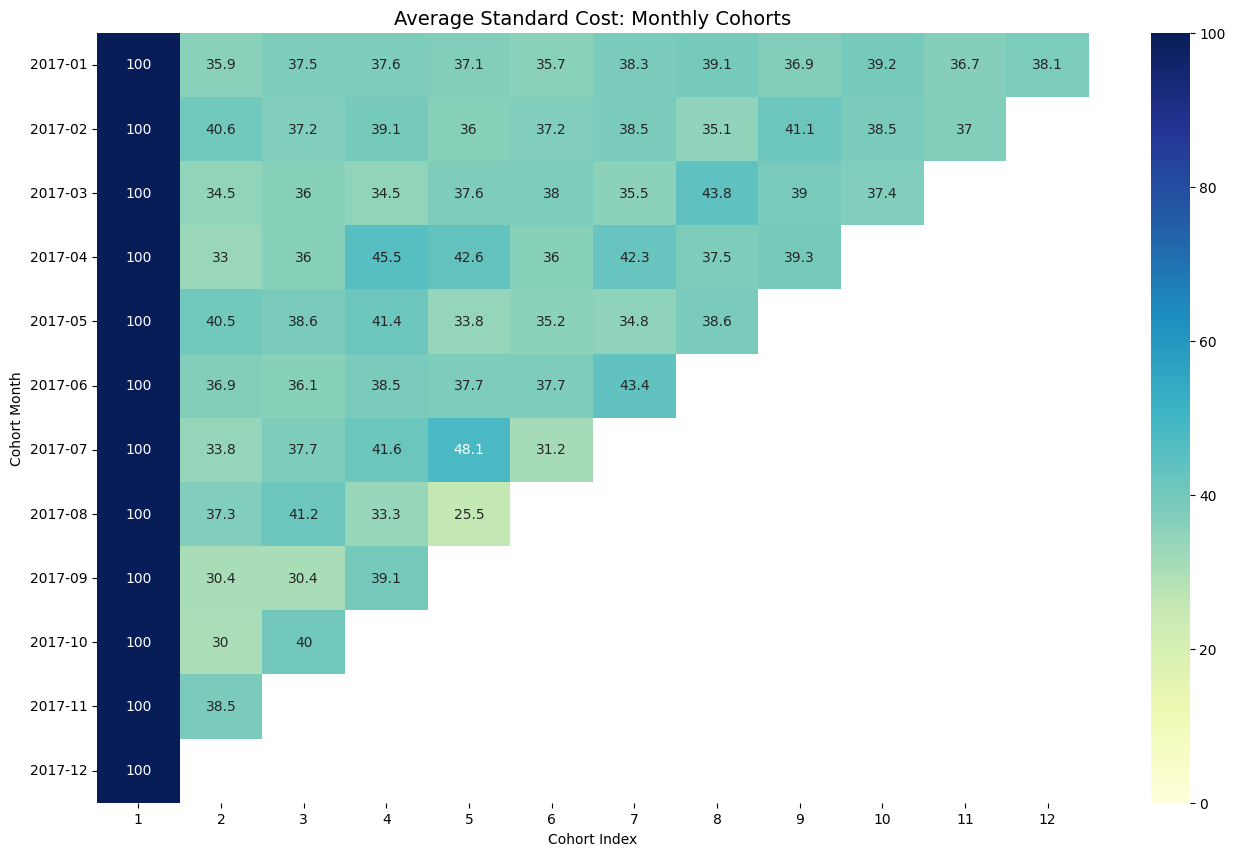

In [121]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation=0)
plt.show()

## Interpreting the retention rate
The most effective way to visualize and analyze cohort analysis data is through a heatmap, as we did above. It provides both the actual metric values and the color-coding to see the differences in the numbers visually.

## Table Explanation

- Cohort Month:The "Cohort Month" refers to the month in which a group of customers (the cohort) made their first purchase or started using a service. Each row in your cohort analysis represents a specific cohort month.

- Cohort Index:
The "Cohort Index" represents the subsequent periods after the cohort month. It's often expressed as months since the cohort's first interaction. Each column in your cohort analysis corresponds to a specific cohort index.

- Retention Rate:The "Retention Rate" is the key metric in cohort analysis. It shows what percentage of customers from a specific cohort (cohort month) continued to engage or make purchases in subsequent periods (cohort index).
It's calculated by dividing the number of retained customers in a cohort index by the initial number of customers in that cohort. The result is typically expressed as a percentage.
A high retention rate indicates that a significant portion of customers from the original cohort remained engaged or made purchases over time, which is generally a positive sign.
A declining retention rate over successive cohort indexes may suggest that customer engagement drops as time goes on, which could indicate issues with customer satisfaction or product usage.




# Insights
- Customers who made their 1st purchase in Feb.2017 has the highest retention rate in the second month which is 40.6%.
- Customers who made their 1st purchase in Jul.2017 has the highest retention rate in the 5th month which is 48.1%.
- Customers who made their 1st purchase in Aug.2017 has the lowest retention rate in the 5th month which is 25.5%.
- Customers who made their 1st purchase in Oct.2017 has the lowest retention rate in the 2nd month which is 30%.
- Customers who made their 1st purchase in Apr.2017 has relatively high retention rate in the following month.

In [122]:
# load Customer Demographic Sheet
customer_demographic_df=pd.read_excel('/content/drive/My Drive/Materials/CustomerDemographic.xlsx')



In [123]:

# Merge the DataFrames based on the 'customer_id' column
combined_df = pd.merge(transaction_df, customer_demographic_df, on='customer_id', how='left')

In [124]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)
# show first five rows
combined_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,brand,TransactionMonth,CohortMonth,CohortIndex,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,False,Approved,Standard,medium,medium,71.49,53.62,Solex,2017-02-01,2017-02-01,1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,True,Approved,Standard,medium,large,2091.47,388.92,Trek,2017-05-01,2017-01-01,5,Lauree O'Donnell,Female,89.0,1979-02-04,44.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
2,3,37,402,2017-10-16,False,Approved,Standard,low,medium,1793.43,248.82,OHM,2017-10-01,2017-01-01,10,Berne Donegan,Male,9.0,1977-06-03,46.0,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0
3,4,88,3135,2017-08-31,False,Approved,Standard,medium,medium,1198.46,381.1,Norco,2017-08-01,2017-02-01,7,Titus Worsall,Male,83.0,1962-01-14,61.0,Staff Scientist,Financial Services,Mass Customer,N,No,16.0
4,5,78,787,2017-10-01,True,Approved,Standard,medium,large,1765.3,709.48,Giant,2017-10-01,2017-01-01,10,Norma Batrim,Female,29.0,1996-12-15,26.0,NaN,Retail,Affluent Customer,N,Yes,2.0


In [125]:
# check datase info
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  object        
 1   product_id                           20000 non-null  object        
 2   customer_id                          20000 non-null  object        
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         19640 non-null  object        
 5   order_status                         20000 non-null  object        
 6   product_line                         20000 non-null  object        
 7   product_class                        20000 non-null  object        
 8   product_size                         20000 non-null  object        
 9   list_price                           20000 non-null  object        
 10  standard_c

In [126]:
# check missing values
combined_df.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                            360
order_status                              0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                           197
brand                                     0
TransactionMonth                          0
CohortMonth                               0
CohortIndex                               0
name                                   1372
gender                                 1372
past_3_years_bike_related_purchases    1372
DOB                                    1372
age                                    1372
job_title                              3613
job_industry_category                  4446
wealth_segment                  

In [127]:

# Drop rows with missing values
combined_df.dropna(inplace=True)
# check the dataset again
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13435 entries, 1 to 19999
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       13435 non-null  object        
 1   product_id                           13435 non-null  object        
 2   customer_id                          13435 non-null  object        
 3   transaction_date                     13435 non-null  datetime64[ns]
 4   online_order                         13435 non-null  object        
 5   order_status                         13435 non-null  object        
 6   product_line                         13435 non-null  object        
 7   product_class                        13435 non-null  object        
 8   product_size                         13435 non-null  object        
 9   list_price                           13435 non-null  object        
 10  standard_c

In [128]:
# statical summary
combined_df.describe()

,CohortIndex,past_3_years_bike_related_purchases,age,tenure
count,13435.000000,13435.000000,13435.000000,13435.000000
mean,5.236025,49.391812,44.311053,10.634016
std,3.434933,28.615285,11.793870,5.705631
min,1.000000,0.000000,21.000000,1.000000
25%,2.000000,25.000000,35.000000,6.000000
50%,5.000000,48.000000,45.000000,11.000000
75%,8.000000,74.000000,53.000000,15.000000
max,12.000000,99.000000,88.000000,22.000000


- We notice that product_frist_sold_date is in numerical format, which is confusing. So we drop them. Also we would like to change the name of the column past_3_years_bike_related_purchases to past_bike_purchases.
- Our dataset also doesn't have any outliers.

In [130]:
# change column names past_3_years_bike_related_purchases to past_bike_purchases

combined_df.rename(columns={'past_3_years_bike_related_purchases': 'past_bike_purchases'}, inplace=True)

In [131]:
# check the data
combined_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,brand,TransactionMonth,CohortMonth,CohortIndex,name,gender,past_bike_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,2,3,3120,2017-05-21,True,Approved,Standard,medium,large,2091.47,388.92,Trek,2017-05-01,2017-01-01,5,Lauree O'Donnell,Female,89.0,1979-02-04,44.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
2,3,37,402,2017-10-16,False,Approved,Standard,low,medium,1793.43,248.82,OHM,2017-10-01,2017-01-01,10,Berne Donegan,Male,9.0,1977-06-03,46.0,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0
3,4,88,3135,2017-08-31,False,Approved,Standard,medium,medium,1198.46,381.1,Norco,2017-08-01,2017-02-01,7,Titus Worsall,Male,83.0,1962-01-14,61.0,Staff Scientist,Financial Services,Mass Customer,N,No,16.0
5,6,25,2339,2017-03-08,True,Approved,Road,medium,medium,1538.99,829.65,Giant,2017-03-01,2017-02-01,2,Damien Haddeston,Male,3.0,1958-12-28,64.0,Web Designer II,Property,Affluent Customer,N,Yes,16.0
6,7,22,1542,2017-04-21,True,Approved,Standard,medium,medium,60.34,45.26,WeareA2B,2017-04-01,2017-02-01,3,Sanders Fernyhough,Male,56.0,1978-07-27,45.0,Food Chemist,Health,Mass Customer,N,Yes,12.0


In [132]:
# Check for duplicates and create a Boolean Series
duplicates = combined_df.duplicated()

# Print the rows that are duplicates (if any)
print(combined_df[duplicates])

# Optionally, count the total number of duplicates
num_duplicates = duplicates.sum()
print(f"Total number of duplicates: {num_duplicates}")

Empty DataFrame
Columns: [transaction_id, product_id, customer_id, transaction_date, online_order, order_status, product_line, product_class, product_size, list_price, standard_cost, brand, TransactionMonth, CohortMonth, CohortIndex, name, gender, past_bike_purchases, DOB, age, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure]
Index: []
Total number of duplicates: 0


- We don't have any duplicates, which is great.

In [133]:
# check  umber of unique values
unique_value_counts = combined_df.nunique()

# Display the number of unique values for each column
print(unique_value_counts)

transaction_id           13435
product_id                 101
customer_id               2410
transaction_date           364
online_order                 2
order_status                 2
product_line                 4
product_class                3
product_size                 3
list_price                 100
standard_cost              100
brand                        6
TransactionMonth            12
CohortMonth                 12
CohortIndex                 12
name                      2410
gender                       2
past_bike_purchases        100
DOB                       2215
age                         48
job_title                  194
job_industry_category        9
wealth_segment               3
deceased_indicator           1
owns_car                     2
tenure                      22
dtype: int64


In [134]:
# check unique values of categorical columns except job_title and name columns
categorical_columns = combined_df.select_dtypes(include=['object'])  # Select only columns with object (string) dtype

# Exclude the 'job_title' and 'name' columns from the categorical columns list
exclude_columns = ['job_title', 'name']
categorical_columns = categorical_columns.drop(columns=exclude_columns, errors='ignore')

for column in categorical_columns:
    unique_values = combined_df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in transaction_id: [2 3 4 ... 19997 19998 20000]
Unique values in product_id: [3 37 88 25 22 15 67 12 61 16 33 54 27 82 64 19 72 91 1 99 0 92 14 2 44 76
 46 66 35 81 86 77 47 94 93 38 58 50 80 87 84 31 17 73 45 95 4 78 89 70 26
 36 98 75 42 96 65 29 10 7 9 56 6 69 97 100 55 90 62 20 74 51 63 8 13 30
 23 21 57 48 49 53 68 18 79 40 32 71 24 59 83 28 43 34 11 39 52 5 85 41 60]
Unique values in customer_id: [3120 402 3135 ... 2789 3446 3168]
Unique values in online_order: [True False]
Unique values in order_status: ['Approved' 'Cancelled']
Unique values in product_line: ['Standard' 'Road' 'Mountain' 'Touring']
Unique values in product_class: ['medium' 'low' 'high']
Unique values in product_size: ['large' 'medium' 'small']
Unique values in list_price: [2091.47 1793.43 1198.46 1538.99 60.34 1292.84 1071.23 1231.15 71.16
 1661.92 1765.3 1311.44 499.53 1469.44 574.64 360.4 642.31 1403.5 1720.7
 544.05 1415.01 1842.92 71.49 1769.64 1289.85 1163.89 1057.51 1151.96
 235.63 1240.31 3

- There is a numerical value in column Order_status, we need to check it.

In [135]:
filtered_rows = combined_df[combined_df['online_order'] == 0.5004582484725051]

# Display the rows that meet the condition
filtered_rows.shape[0]

0

- There are 233 rows whose value is a a numerical value in the online_order column whcih is supposed to be a bollean column. So we decide to drop them.

In [136]:
# Drop the rows that meet the condition
# Drop the filtered rows
combined_df.drop(filtered_rows.index, inplace=True)

# Optional: Reset the index after dropping rows
combined_df.reset_index(drop=True, inplace=True)


In [138]:
#
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13435 entries, 0 to 13434
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transaction_id         13435 non-null  object        
 1   product_id             13435 non-null  object        
 2   customer_id            13435 non-null  object        
 3   transaction_date       13435 non-null  datetime64[ns]
 4   online_order           13435 non-null  object        
 5   order_status           13435 non-null  object        
 6   product_line           13435 non-null  object        
 7   product_class          13435 non-null  object        
 8   product_size           13435 non-null  object        
 9   list_price             13435 non-null  object        
 10  standard_cost          13435 non-null  object        
 11  brand                  13435 non-null  object        
 12  TransactionMonth       13435 non-null  datetime64[ns]
 13  C

- Now the dataset is clean and ready for analysis.

# EDA

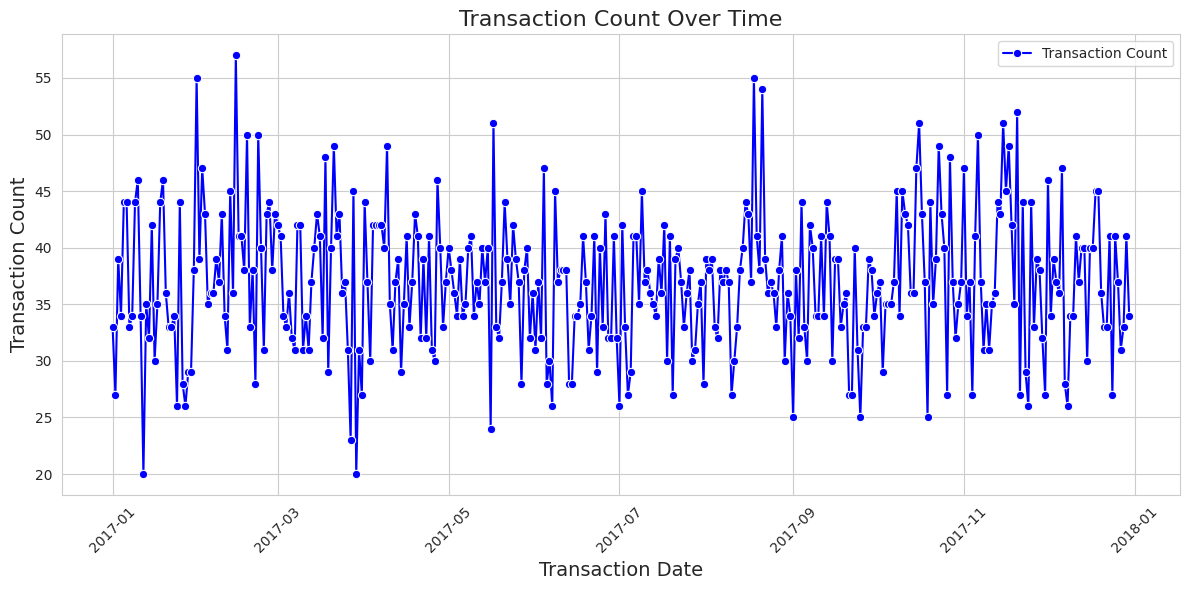

In [139]:
# Group the data by "transaction_date" and count the number of transactions for each date
transaction_count = combined_df.groupby('transaction_date').size().reset_index(name='count')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=transaction_count, x='transaction_date', y='count', marker='o', color='b', label='Transaction Count')

# Add labels and title
plt.xlabel('Transaction Date', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.title('Transaction Count Over Time', fontsize=16)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Ensure all labels are visible
plt.legend()
plt.show()

- We can see from above that there are 2 peaks for the transaction count they are in Feb.2017 and Aug, 2017, which may also explains why we have higher retention rate in these 2 months.

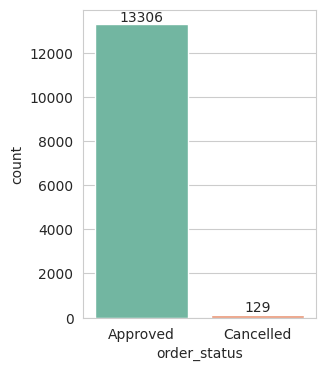

In [140]:
# check how many transctions approved
plt.figure(figsize=(3,4))
ax = sns.countplot(x='order_status',data=combined_df,palette="Set2")
for item in ax.containers:
    ax.bar_label(item,)

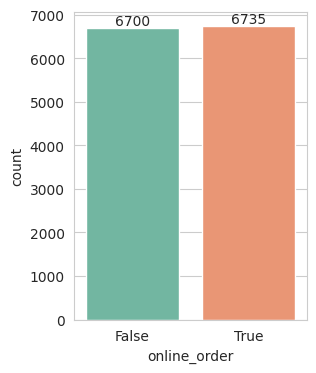

In [141]:
# check how many transctions are online orders
plt.figure(figsize=(3,4))
ax = sns.countplot(x='online_order',data=combined_df,palette="Set2")
for item in ax.containers:
    ax.bar_label(item,)

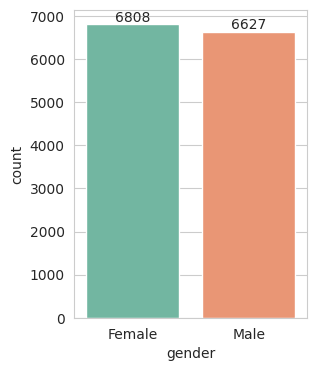

In [142]:
# check customers gender
plt.figure(figsize=(3,4))
ax = sns.countplot(x='gender',data=combined_df,palette="Set2")
for item in ax.containers:
    ax.bar_label(item,)

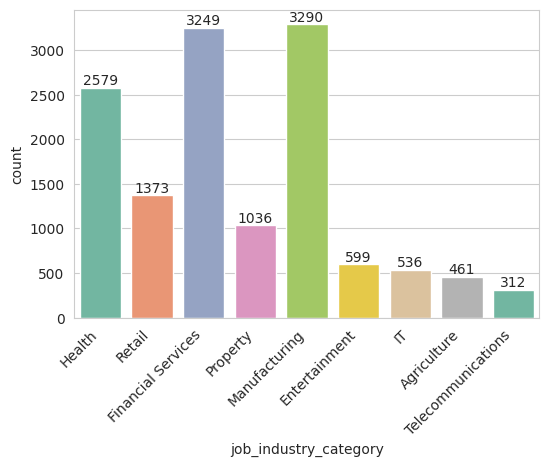

In [143]:
# check customer industry
plt.figure(figsize=(6,4))
ax = sns.countplot(x='job_industry_category',data=combined_df,palette="Set2")
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Add labels on top of the bars
for item in ax.containers:
    ax.bar_label(item)

# Show the plot
plt.show()

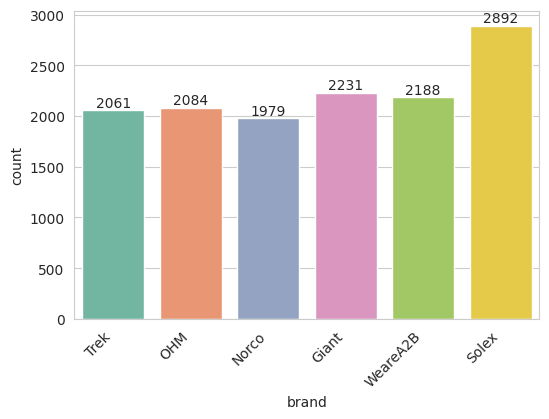

In [144]:
# check brands
plt.figure(figsize=(6,4))
ax = sns.countplot(x='brand',data=combined_df,palette="Set2")
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Add labels on top of the bars
for item in ax.containers:
    ax.bar_label(item)

# Show the plot
plt.show()

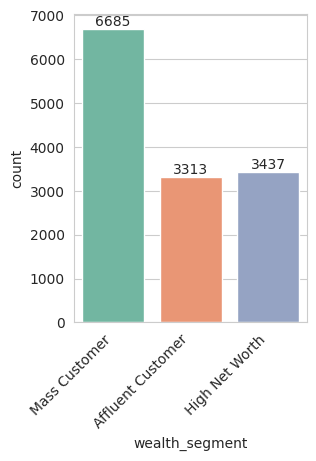

In [145]:
# check customers wealth_segment
plt.figure(figsize=(3,4))
ax = sns.countplot(x='wealth_segment',data=combined_df,palette="Set2")
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Add labels on top of the bars
for item in ax.containers:
    ax.bar_label(item)

# Show the plot
plt.show()

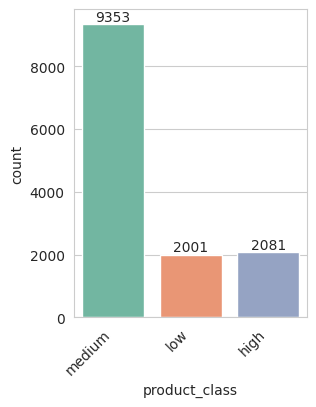

In [146]:
# check product_class
plt.figure(figsize=(3,4))
ax = sns.countplot(x='product_class',data=combined_df,palette="Set2")
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Add labels on top of the bars
for item in ax.containers:
    ax.bar_label(item)

# Show the plot
plt.show()

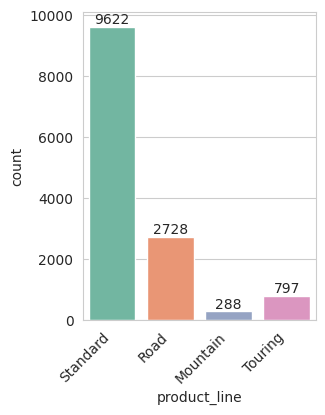

In [147]:
# check product_line
plt.figure(figsize=(3,4))
ax = sns.countplot(x='product_line',data=combined_df,palette="Set2")
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Add labels on top of the bars
for item in ax.containers:
    ax.bar_label(item)

# Show the plot
plt.show()

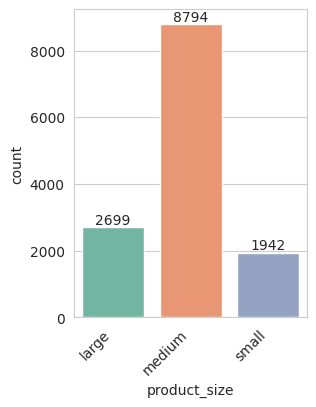

In [148]:
# check product_size
plt.figure(figsize=(3,4))
ax = sns.countplot(x='product_size',data=combined_df,palette="Set2")
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Add labels on top of the bars
for item in ax.containers:
    ax.bar_label(item)

# Show the plot
plt.show()

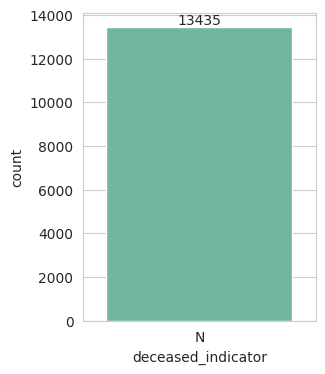

In [149]:
# check customers deceased or not
plt.figure(figsize=(3,4))
ax = sns.countplot(x='deceased_indicator',data=combined_df,palette="Set2")
for item in ax.containers:
    ax.bar_label(item,)

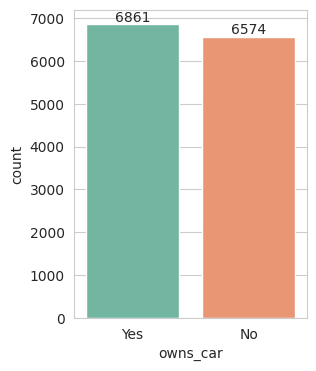

In [150]:
# check customers owns_car or not
plt.figure(figsize=(3,4))
ax = sns.countplot(x='owns_car',data=combined_df,palette="Set2")
for item in ax.containers:
    ax.bar_label(item,)

- Among the 13563 transactions, 13434 were approved. So more than 99% of the transactions were approved.
- Among all the orders, 50% of them are online orders and others are in-store orders.
- Among all the customers, we have relatively equal number of female and male customers. The number of female customers are relatively higher.
- Among all the customers, the Financial Services and Manufacturing are predominant industries where customers coming from.
- Among all the transctions, Solex is undoubtedly dominant .
- Among all the customers, most of them are mass customer.
- Most of the products sold are medium in class,  which occupies about 70% of all the transactions.
- Most of all the products sold are standard, which occupies about 72% of all the transactions.
- Most of all the products sold are medium in size, which occupies about 66% of all the transactions.
- All the customers are not deceased which is good.
- About 51% of the customers own a car and 49% doesn't own a car.


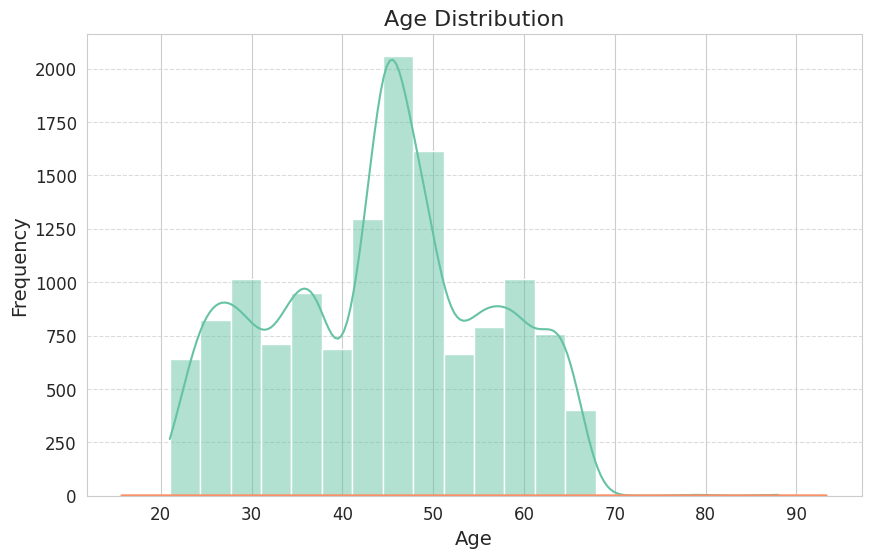

In [151]:
# check customer age distribution
# Set a custom color palette
custom_palette = sns.color_palette("Set2")
# Create a figure and axis with customized style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(data=combined_df, x='age', kde=True, bins=20, color=custom_palette[0])

# Add a title, labels, and grid
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Customize the KDE curve
sns.kdeplot(data=combined_df, x='age', color=custom_palette[1], linewidth=2)

# Show the plot
plt.show()


- We can observe from the above data that the majority of our customers fall within the age range of 40 to 50.

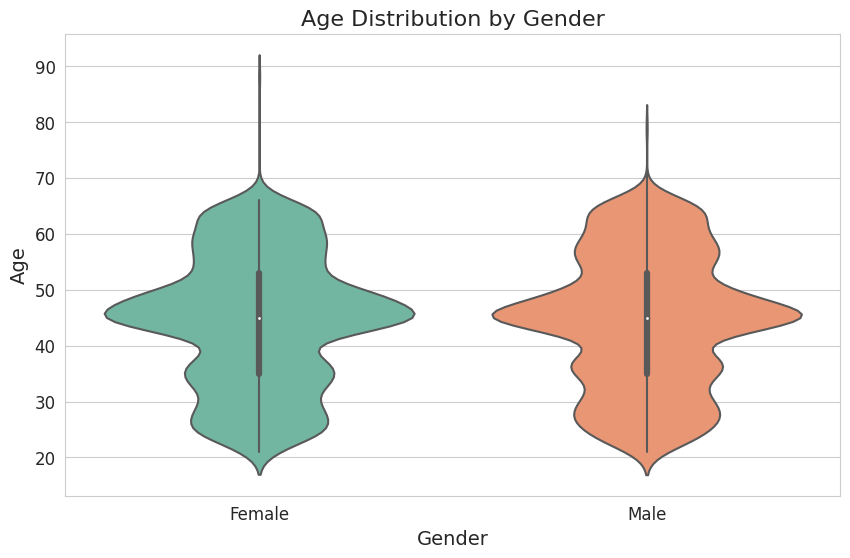

In [152]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
# check age distribution by gender using violin plot
sns.violinplot(data=combined_df, x='gender', y='age', palette="Set2")
plt.title("Age Distribution by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

- We can see most of our customers are female and male and they are around 45 years old.

<ipython-input-153-0ae0d96a384d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=combined_df['list_price'], shade=True, color='skyblue')


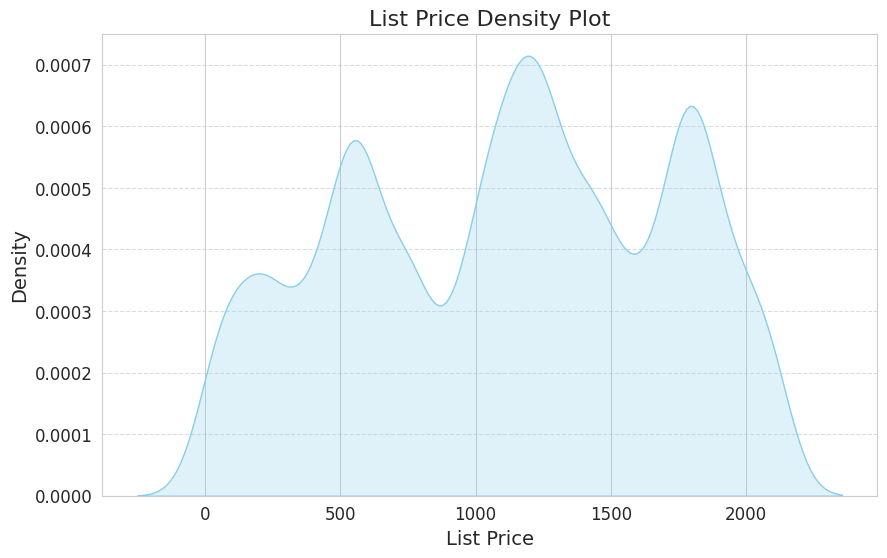

In [153]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
# check list_price distribution
sns.kdeplot(data=combined_df['list_price'], shade=True, color='skyblue')
plt.title("List Price Density Plot", fontsize=16)
plt.xlabel("List Price", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

- The majority of the list price are between 500 and 1500.

<ipython-input-154-c9a4daf192d1>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=combined_df['standard_cost'], shade=True, color='skyblue')


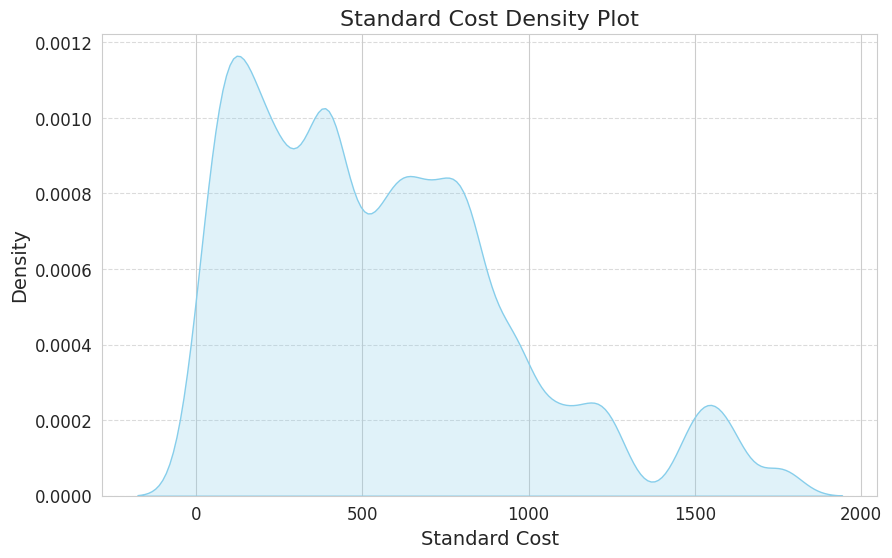

In [154]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.kdeplot(data=combined_df['standard_cost'], shade=True, color='skyblue')
plt.title("Standard Cost Density Plot", fontsize=16)

plt.xlabel("Standard Cost", fontsize=14)

plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

- Most of the transactions standard cost is in the range of 0-1000.

# Cohort Analysis Demographic Analysis

In [155]:
# selct high_retention_rate column
# Select rows where CohortMonth is 2017-07-01 and CohortIndex is 2
segment_1 = combined_df[(combined_df['CohortMonth'] == '2017-07-01') & (combined_df['CohortIndex'] == 2)]

# Select rows where CohortMonth is 2017-02-01 and CohortIndex is 5
segment_2 = combined_df[(combined_df['CohortMonth'] == '2017-02-01') & (combined_df['CohortIndex'] == 5)]

# Concatenate the two segments into a new DataFrame
high_retention_segment = pd.concat([segment_1, segment_2])

# Reset the index of the new DataFrame
high_retention_segment.reset_index(drop=True, inplace=True)
# check the first 5 rows
high_retention_segment.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,brand,TransactionMonth,CohortMonth,CohortIndex,name,gender,past_bike_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,268,68,1516,2017-08-27,False,Approved,Standard,medium,medium,1636.9,44.71,OHM,2017-08-01,2017-07-01,2,Ham Pietrusiak,Male,6.0,1967-07-12,56.0,VP Sales,IT,Affluent Customer,N,No,19.0
1,1390,49,3474,2017-08-15,True,Approved,Road,medium,medium,533.51,400.13,Trek,2017-08-01,2017-07-01,2,Justinian Crowhurst,Male,93.0,1979-11-06,43.0,Assistant Manager,Manufacturing,Mass Customer,N,No,14.0
2,1467,89,1894,2017-08-27,False,Approved,Standard,medium,large,1812.75,582.48,Giant,2017-08-01,2017-07-01,2,Patten Laytham,Male,86.0,1976-04-01,47.0,Automation Specialist III,Manufacturing,High Net Worth,N,Yes,17.0
3,1606,40,1847,2017-08-08,True,Approved,Standard,high,medium,1458.17,874.9,OHM,2017-08-01,2017-07-01,2,Bobinette Stanaway,Female,68.0,1978-02-04,45.0,Executive Secretary,Manufacturing,Mass Customer,N,No,6.0
4,1976,3,3474,2017-08-26,True,Approved,Standard,medium,large,2091.47,388.92,Trek,2017-08-01,2017-07-01,2,Justinian Crowhurst,Male,93.0,1979-11-06,43.0,Assistant Manager,Manufacturing,Mass Customer,N,No,14.0


In [156]:
# check the segement number
high_retention_segment.shape[0]

265

In [157]:
# Select low_retention_rate segment
# Select rows where CohortMonth is 2017-08-01 and CohortIndex is 5
segment_1 = combined_df[(combined_df['CohortMonth'] == '2017-08-01') & (combined_df['CohortIndex'] == 5)]

# Select rows where CohortMonth is 2017-10-01 and CohortIndex is 2
segment_2 = combined_df[(combined_df['CohortMonth'] == '2017-10-01') & (combined_df['CohortIndex'] == 2)]

# Concatenate the two segments into a new DataFrame
low_retention_segment = pd.concat([segment_1, segment_2])

# Reset the index of the new DataFrame
low_retention_segment.reset_index(drop=True, inplace=True)
# check the first 5 rows
low_retention_segment.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,product_line,product_class,product_size,list_price,standard_cost,brand,TransactionMonth,CohortMonth,CohortIndex,name,gender,past_bike_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,599,45,1059,2017-12-08,True,Approved,Road,low,medium,980.37,234.43,Trek,2017-12-01,2017-08-01,5,Chantal Plante,Female,68.0,1968-02-16,55.0,Account Representative III,Entertainment,High Net Worth,N,Yes,6.0
1,1018,43,1910,2017-12-13,False,Approved,Standard,medium,medium,1555.58,818.01,Norco,2017-12-01,2017-08-01,5,Yovonnda Warrior,Female,20.0,1959-07-13,64.0,Systems Administrator I,Property,High Net Worth,N,Yes,14.0
2,5220,58,1630,2017-12-07,True,Approved,Standard,medium,medium,912.52,141.4,OHM,2017-12-01,2017-08-01,5,Sonni Lindstedt,Female,63.0,1984-09-16,38.0,Professor,Manufacturing,Mass Customer,N,No,16.0
3,5543,31,849,2017-12-03,True,Approved,Standard,medium,medium,230.91,173.18,Giant,2017-12-01,2017-08-01,5,Sylvan Capper,Male,72.0,1969-09-15,53.0,Librarian,Entertainment,Mass Customer,N,No,10.0
4,11466,59,2330,2017-12-26,False,Approved,Standard,medium,large,1061.56,733.58,Solex,2017-12-01,2017-08-01,5,Claresta Bonnor,Female,5.0,1990-01-17,33.0,Account Coordinator,Property,Mass Customer,N,No,9.0


In [158]:
low_retention_segment.shape[0]

10

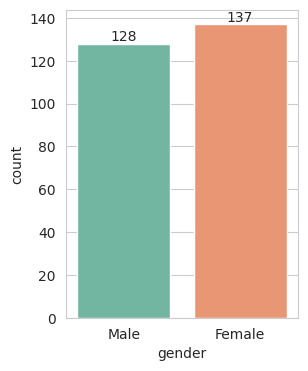

In [159]:
# check customers gender of high_retention_segment
plt.figure(figsize=(3,4))
ax = sns.countplot(x='gender',data=high_retention_segment,palette="Set2")
for item in ax.containers:
    ax.bar_label(item,)

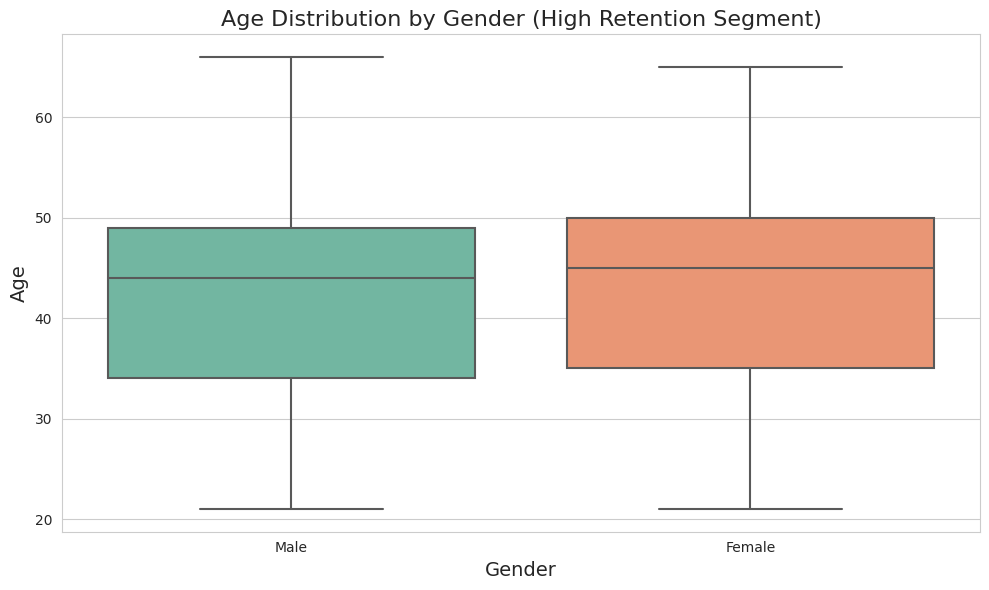

In [160]:
#
# # Set Seaborn style and color palette
sns.set_style("whitegrid")
custom_palette = sns.color_palette("Set2")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=high_retention_segment, x='gender', y='age', palette=custom_palette)

# Add labels and title
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Age Distribution by Gender (High Retention Segment)', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()